In [2]:
import pandas as pd
import numpy as np

## What is vectorization? 

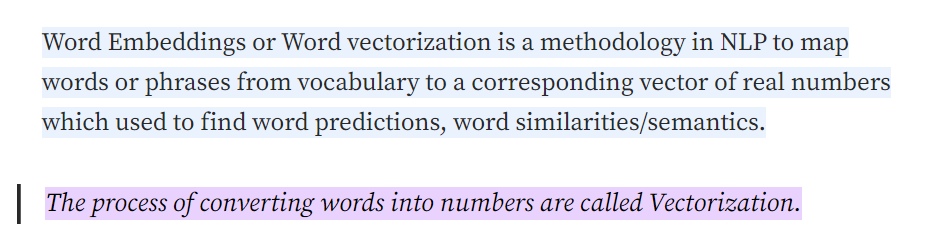

## 1. Bag of Words
- Most simple of all the techniques out there. It involves three operations:

1. Tokenization  
    a. First, the input text is tokenized.   
    b. A sentence is represented as a list of its constituent words, and it’s done for all the input sentences.
    
2. Vocabulary creation
    a. Of all the obtained tokenized words, only unique words are selected to create the vocabulary and then sorted by alphabetical order.  
      

3. Vector creation
    a. Finally, a sparse matrix is created for the input, out of the frequency of vocabulary words. In this sparse matrix, each row is a sentence vector whose length (the columns of the matrix) is equal to the size of the vocabulary.

## Count Vectorizer

In [1]:
sents = ['coronavirus is a highly infectious disease',
   'coronavirus affects older people the most',
   'older people are at high risk due to this disease']

## 1. Tokenization

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

In [9]:
## Applying count vectorizer on text
vec.fit(sents)

CountVectorizer()

In [10]:
vec.vocabulary_

{'coronavirus': 3,
 'is': 9,
 'highly': 7,
 'infectious': 8,
 'disease': 4,
 'affects': 0,
 'older': 11,
 'people': 12,
 'the': 14,
 'most': 10,
 'are': 1,
 'at': 2,
 'high': 6,
 'risk': 13,
 'due': 5,
 'to': 16,
 'this': 15}

In [11]:
sorted(vec.vocabulary_)

['affects',
 'are',
 'at',
 'coronavirus',
 'disease',
 'due',
 'high',
 'highly',
 'infectious',
 'is',
 'most',
 'older',
 'people',
 'risk',
 'the',
 'this',
 'to']

In [14]:
## Transform the text by applying countvectorizer on the text

vec.transform(sents)

<3x17 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [15]:
vec.transform(sents).toarray()

array([[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]], dtype=int64)

In [16]:
op = pd.DataFrame(vec.transform(sents).toarray(), columns = vec.get_feature_names_out())
op

,affects,are,at,coronavirus,disease,due,high,highly,infectious,is,most,older,people,risk,the,this,to
0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0
2,0,1,1,0,1,1,1,0,0,0,0,1,1,1,0,1,1


## TF - IDF Vectorizer

### 2. TF-IDF
1. TF-IDF or Term Frequency–Inverse Document Frequency, is a numerical statistic that’s intended to reflect how important a word is to a document. Although it’s another frequency-based method, it’s not as naive as Bag of Words.

#### Q. How does TF-IDF improve over Bag of Words?

In Bag of Words, we witnessed how vectorization was just concerned with the frequency of vocabulary words in a given document. As a result, articles, prepositions, and conjunctions which don’t contribute a lot to the meaning get as much importance as, say, adjectives. 

TF-IDF helps us to overcome this issue. Words that get repeated too often don’t overpower less frequent but important words.

It has two parts:

#### TF
TF stands for Term Frequency. It can be understood as a normalized frequency score. It is calculated via the following formula:


So one can imagine that this number will always stay ≤ 1, thus we now judge how frequent a word is in the context of all of the words in a document.

#### IDF
IDF stands for Inverse Document Frequency, but before we go into IDF, we must make sense of DF – Document Frequency. It’s given by the following formula:


DF tells us about the proportion of documents that contain a certain word. So what’s IDF?

It’s the reciprocal of the Document Frequency, and the final IDF score comes out of the following formula:


#### Why inverse the DF?

Just as we discussed above, the intuition behind it is that the more common a word is across all documents, the lesser its importance is for the current document.

A logarithm is taken to dampen the effect of IDF in the final calculation.

The final TF-IDF score comes out to be:


This is how TF-IDF manages to incorporate the significance of a word. The higher the score, the more important that word is.

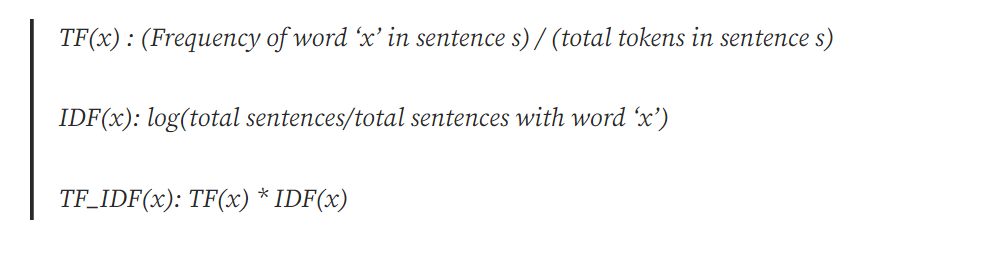

In [19]:
sents = ['coronavirus is a highly infectious disease',
   'coronavirus affects older people the most',
   'older people are at high risk due to this disease']
sents

['coronavirus is a highly infectious disease',
 'coronavirus affects older people the most',
 'older people are at high risk due to this disease']

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [26]:
transformed = tfidf.fit_transform(sents)
transformed

<3x17 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [30]:
pd.DataFrame(transformed.T.toarray())

,0,1,2
0,0.000000,0.459548,0.000000
1,0.000000,0.000000,0.338348
2,0.000000,0.000000,0.338348
3,0.373022,0.349498,0.000000
4,0.373022,0.000000,0.257322
5,0.000000,0.000000,0.338348
6,0.000000,0.000000,0.338348
7,0.490479,0.000000,0.000000
8,0.490479,0.000000,0.000000
9,0.490479,0.000000,0.000000


In [29]:
df = pd.DataFrame(transformed[0].T.toarray(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df

,TF-IDF
infectious,0.490479
highly,0.490479
is,0.490479
coronavirus,0.373022
disease,0.373022
older,0.000000
this,0.000000
the,0.000000
risk,0.000000
people,0.000000


In [31]:
df.shape

(17, 1)

- So, according to TF-IDF, the word ‘infectious’ is the most important feature out there, while many words which would have been used for feature building in a naive approach like Bag of Words, simply amount to 0 here. This is what we wanted all along.

## A few pointers about TF-IDF:

- The concept of n-grams is applicable here as well, we can combine words in groups of 2,3,4, and so on to build our final set of features.
- Along with n-grams, there are also a number of parameters such as min_df, max_df, max_features, sublinear_tf, etc. to play around with. Carefully tuning these parameters can do wonders for your model’s capabilities.
- Despite being so simple, TF-IDF is known to be extensively used in tasks like Information Retrieval to judge which response is the best for a query, especially useful in a chatbot or in Keyword Extraction to determine which word is the most relevant in a document, and thus, you’ll often find yourself banking on the intuitive wisdom of the TF-IDF.

## Hashing Vectorizer

In [38]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=50,norm = None,stop_words='english')
X = vectorizer.fit_transform(sents)
matrix = pd.DataFrame(X.toarray())
matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Hash Vectorizer: This one is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved